# Overview

Implement  process scheduling algorithms :

 > **FCFS: first come first served algorithm**.processes are scheduled in the order they arrive in the ready queue.\
 **SJF = SPN : shortest job first or shortest process next**. the process with the shortest execution time is selected next.\
**priority scheduling**: each process is given a priority and  process with  highest priority is run first\
**Round Robin RR**: each process is assigned a fixed time in a cyclic way\
**Shortest Remaining Time First SRTF**: preemptive version of the Shortest Job Next SJN algorithm, where the processor is allocated to the job closest to completion. It is also known as Shortest Job First with dynamic priority

# Imports

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# 1- FCFS Algorithm

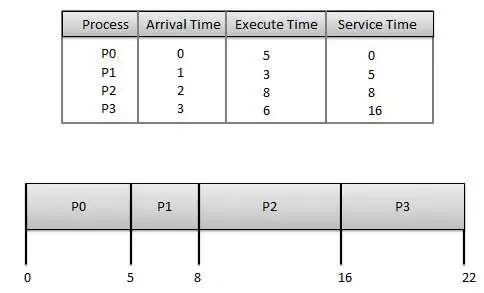

In [61]:
def  fcfs_scheduling(processes):
    n = len(processes)
    # sort by  arrival time
    processes.sort(key=lambda x: x[2])   #list ---> sort (key=)     lambda  x : x[2]     x[2] == Arival time

    start_time = []         #keeps start time of processes
    end_time = []           #keeps end time of processes
    waiting_time = []       #keeps waiting time of processes
    turnaround_time = []    #keeps tt time of processes

    for i in range(n):   #i=0   to i=3
        if i == 0  :
            start_time.append(processes[i][2])  # processes[0][2]
        else:
            start_time.append(end_time[i-1])    # start time of next process is end time of last process
        end_time.append(start_time[i] + processes[i][1])     #end_time[1] = start_time[1] +  burst_time=execution_time
        waiting_time.append(start_time[i] - processes[i][2])
        turnaround_time.append(end_time[i] - processes[i][2])

    return start_time, end_time, waiting_time, turnaround_time

def plot_gantt_chart(processes, start_time, end_time):
    fig, axe = plt.subplots()
    axe.set_xlabel('time')
    axe.set_ylabel('processes')

    axe.set_yticks([10 + 10*i for i in range(len(processes))]) #[10 , 20, 30 , 40 ]
    axe.set_yticklabels([f'P{processes[i][0]}' for i in range(len(processes))])
    axe.grid(True)

    colors = ["red","blue","green","black"]
    for i in range(len(start_time)):
        axe.broken_barh([(start_time[i], end_time[i] - start_time[i])], (10*(i+1), 10), facecolors=(colors[i%len(colors)]))
                       #i=0          (0 , 5 )                           (10*(0+1),10 )
    plt.show()

# process list : -> (pid, burst time, arrival time)     //busrt = execution time
processes = [(0,12,5),(1,3,7),(2,2,35),(3,0,0)]

start_time, end_time, WT, TT =  fcfs_scheduling(processes)
print("process :","(pid, burst time, arrival time)")
print("process :",processes)
print("FCFS WT: ",WT)
print("FCFS TT: ",TT)

process : (pid, burst time, arrival time)
process : [(3, 0, 0), (0, 12, 5), (1, 3, 7), (2, 2, 35)]
FCFS WT:  [0, -5, 5, -20]
FCFS TT:  [0, 7, 8, -18]


### FCFS sample Gantt Chart

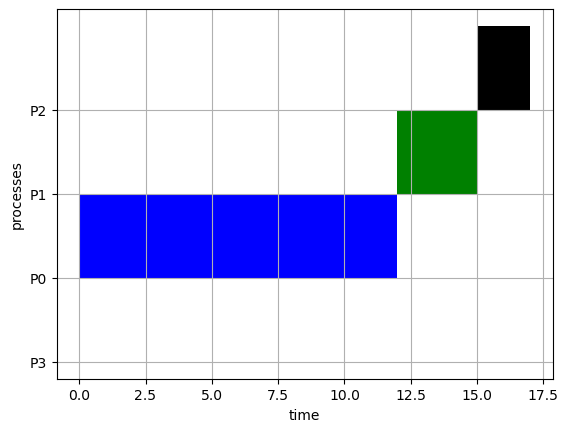

In [62]:
plot_gantt_chart(processes, start_time, end_time)

# SJF Algorithm

 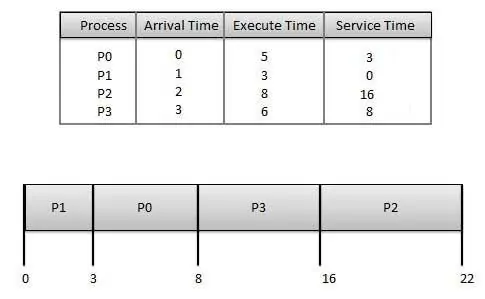

In [47]:
def  sjf_scheduling(processes):
    n = len(processes)
    #sort by arrival
    processes.sort(key=lambda x: x[2])


    completed = [False] * n
    start_time = [0] * n
    end_time = [0] * n
    waiting_time = [0] * n
    turnaround_time = [0] * n
    current_time = 0
    completed_processes = 0

    while completed_processes < n:
        # find process with shortest burst time
        idx = -1
        min_burst_time = float('inf')
        for i in range(n):
            if not completed[i] and processes[i][2] <= current_time and processes[i][1] < min_burst_time:
                min_burst_time = processes[i][1]
                idx = i

        if idx != -1:  # process found
            start_time[idx] = current_time
            end_time[idx] = start_time[idx] + processes[idx][1]
            waiting_time[idx] = start_time[idx] - processes[idx][2]
            turnaround_time[idx] = processes[idx][1] + waiting_time[idx]
            current_time = end_time[idx]
            completed[idx] = True
            completed_processes += 1
        else:  # no process
            current_time += 1

    return start_time, end_time, waiting_time, turnaround_time

def plot_gantt_sjf_chart(processes, start_time, end_time):
    fig, axe = plt.subplots()
    axe.set_xlabel('time')
    axe.set_ylabel('processes')

    y_ticks = [10 + 10*i for i in range(len(processes))]
    axe.set_yticks(y_ticks)
    axe.set_yticklabels([f'P{processes[i][0]}' for i in range(len(processes))])
    axe.grid(True)

    colors =["blue","red","green","yellow"]
    for i in range(len(start_time)):
        axe.broken_barh([(start_time[i], end_time[i] - start_time[i])], (10*(i+1), 10), facecolors=(colors[i%len(colors)]))

    plt.show()

# process list  --> (pid, burst time, arrival time)
processes = [(0, 5, 0), (1, 3, 1), (2, 8, 2), (3, 6, 3)]

start_time, end_time, WT, TT = sjf_scheduling(processes)


print("process :","(pid, burst time, arrival time)")
print("process :",processes)
print("SJF WT: ",WT)
print("SJF TT: ",TT)

process : (pid, burst time, arrival time)
process : [(0, 5, 0), (1, 3, 1), (2, 8, 2), (3, 6, 3)]
SJF WT:  [0, 4, 12, 5]
SJF TT:  [5, 7, 20, 11]


### SJF Gantt Chart

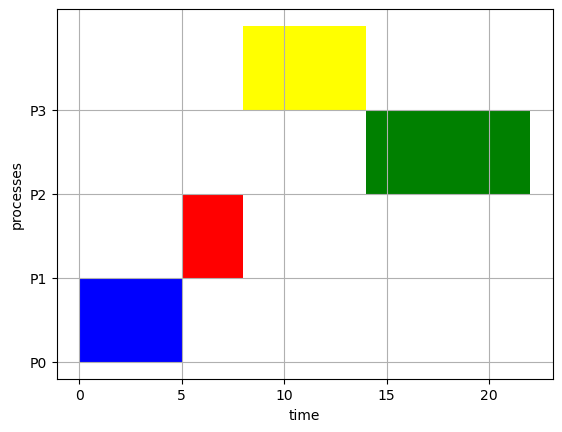

In [48]:
plot_gantt_sjf_chart(processes, start_time, end_time)

# HRRN Algorithm

 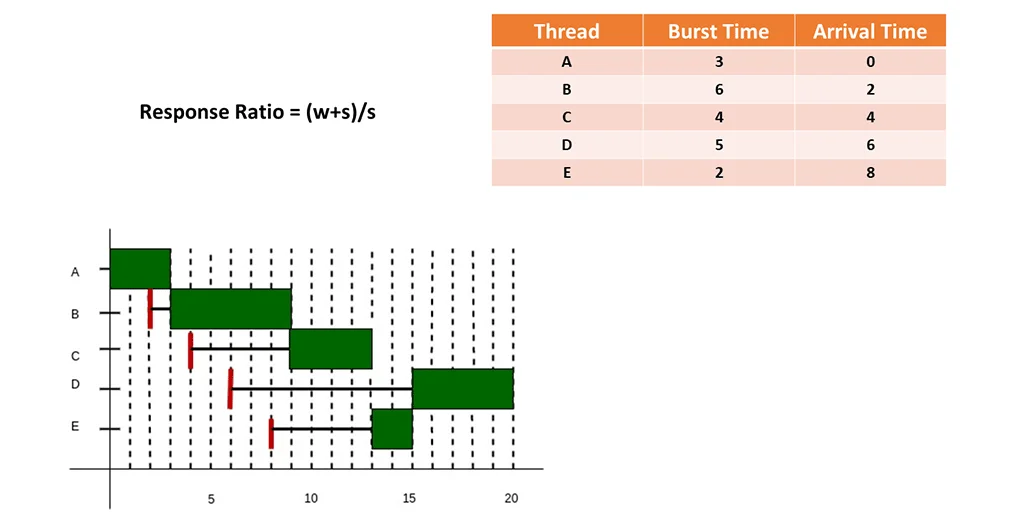

In [49]:

def  hrrn_scheduling(processes):
    n = len(processes)
    processes.sort(key=lambda x: x[2])
    completed = [False] * n
    start_time = [0] * n
    end_time = [0] * n
    waiting_time = [0] * n
    turnaround_time = [0] * n
    current_time = 0
    completed_processes = 0

    while completed_processes < n:
        # get response ratio for each process
        max_ratio = -1
        idx = -1
        for i in range(n):
            if not completed[i] and processes[i][2] <= current_time:
                response_ratio = (current_time - processes[i][2] + processes[i][1]) / processes[i][1]
                if response_ratio > max_ratio:
                    max_ratio = response_ratio
                    idx = i

        if idx != -1:
            start_time[idx] = current_time
            end_time[idx] = start_time[idx] + processes[idx][1]
            waiting_time[idx] = start_time[idx] - processes[idx][2]
            turnaround_time[idx] = processes[idx][1] + waiting_time[idx]
            current_time = end_time[idx]
            completed[idx] = True
            completed_processes += 1
        else:
            current_time += 1

    return start_time, end_time, waiting_time, turnaround_time

def plot_hrrn_gantt_chart(processes, start_time, end_time):
    fig, axe = plt.subplots()
    axe.set_xlabel('time')
    axe.set_ylabel('processes')

    y_ticks = [10 + 10*i for i in range(len(processes))]
    axe.set_yticks(y_ticks)
    axe.set_yticklabels([f'P{processes[i][0]}' for i in range(len(processes))])
    axe.grid(True)

    colors = ["red","blue","green","yellow","black","orange"]
    for i in range(len(start_time)):
        axe.broken_barh([(start_time[i], end_time[i] - start_time[i])], (10*(i+1), 9), facecolors=(colors[i%len(colors) ]))

    plt.show()


processes = [(0, 3, 0), (1, 6, 2), (2, 4, 4), (3, 5, 6), (4, 2, 8)]
start_time, end_time, WT, TT =  hrrn_scheduling(processes)


print("process :","(pid, burst time, arrival time)")
print("process :",processes)
print("HRRN WT: ",WT)
print("HRRN TT: ",TT)

process : (pid, burst time, arrival time)
process : [(0, 3, 0), (1, 6, 2), (2, 4, 4), (3, 5, 6), (4, 2, 8)]
HRRN WT:  [0, 1, 5, 9, 5]
HRRN TT:  [3, 7, 9, 14, 7]


### HRRN Gantt Chart

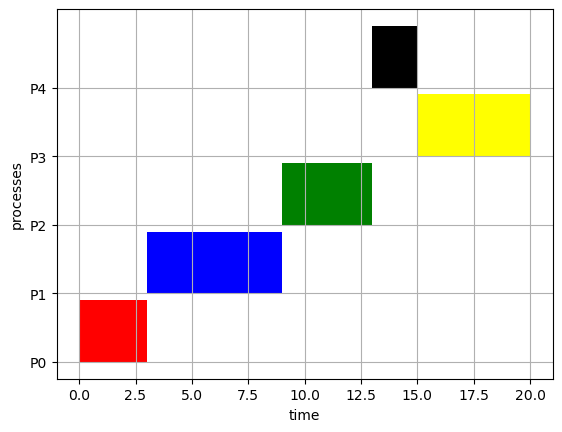

In [50]:

plot_hrrn_gantt_chart(processes, start_time, end_time)

# Priority Scheduling Algorithm

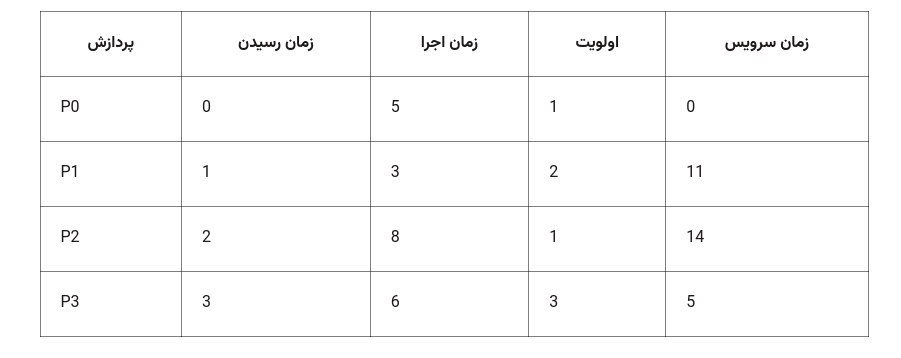

In [51]:

def priority_scheduling(processes):
    n = len(processes)
    #sort by arrival time

    processes.sort(key=lambda x: (x[2] ))
    #[(0, 5, 0, 1), (1, 3, 1, 2), (2, 8, 2, 1), (3, 6, 3, 3) ]
    timer=0
    for i in range(n):
        for j in range(i + 1, n):
            if processes[i][2] == processes[j][2]:
                if processes[i][3] < processes[j][3]:
                    processes[i], processes[j] = processes[j], processes[i]
            timer = sum([processes[k][1] for  k in range(i)])
            if processes[j][2] < timer:
                if processes[i][3] < processes[j][3]:
                    processes[i], processes[j] = processes[j], processes[i]

    #[ (0, 5, 0, 1), (3, 6, 3, 3)   (1, 3, 1, 2), (2, 8, 2, 1)  ]
    orders = ["p"+str(i[0]) for i in processes]
    print(f"Processes Execution Order = {orders}")


    print("*" * 50)
    start_time = [0] * n
    end_time = [0] * n
    waiting_time = [0] * n
    turnaround_time = [0] * n
    current_time = 0

    for i in range(n):  #i[0 , 1 ,2 , 3 ]
        if current_time  < processes[i][2]:        #check time with arrival_time
            current_time = processes[i][2]
        start_time[i] = current_time
        end_time[i] = start_time[i] +      processes[i][1]      #starttime + execution time
        waiting_time[i] = start_time[i]  - processes[i][2]      #wt = starttime - arrival_time
        turnaround_time[i] = end_time[i] - processes[i][2]      #tt = endtime- arrival_time
        current_time = end_time[i]

    return start_time, end_time, waiting_time, turnaround_time

def plot_priority_gantt_chart(processes, start_time, end_time):
    fig, axe = plt.subplots()
    axe.set_xlabel('time')
    axe.set_ylabel('processes')

    y_ticks = [10 + 10*i for i in range(len(processes))]
    axe.set_yticks(y_ticks)
    axe.set_yticklabels([f'P{processes[i][0]}' for i in range(len(processes))])
    axe.grid(True)

    colors = ["red","blue","green","yellow","orange"]
    for i in range(len(start_time)):
        axe.broken_barh([(start_time[i], end_time[i] - start_time[i])], (10*(i+1), 10), facecolors=(colors[i%len(colors)]))

    plt.show()

#            (pid, burst time, arrival time , priority)
processes = [(0, 5, 0, 1), (1, 3, 1, 2), (2, 8, 2, 1), (3, 6, 3, 3) ]

start_time, end_time, WT, TT =  priority_scheduling(processes)
print("Process :","(pid, burst time, arrival time , priority)")
print("process :",processes)
print("priority WT: ",WT)
print("priority TT: ",TT)

Processes Execution Order = ['p0', 'p3', 'p1', 'p2']
**************************************************
Process : (pid, burst time, arrival time , priority)
process : [(0, 5, 0, 1), (3, 6, 3, 3), (1, 3, 1, 2), (2, 8, 2, 1)]
priority WT:  [0, 2, 10, 12]
priority TT:  [5, 8, 13, 20]


### proirity Gantt chart

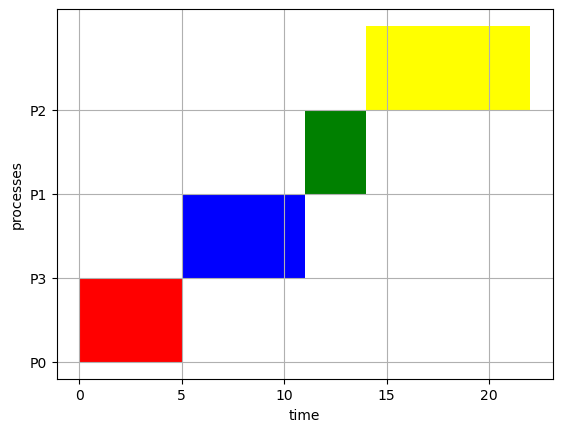

In [52]:
plot_priority_gantt_chart(processes, start_time, end_time)

# RR Algorithm

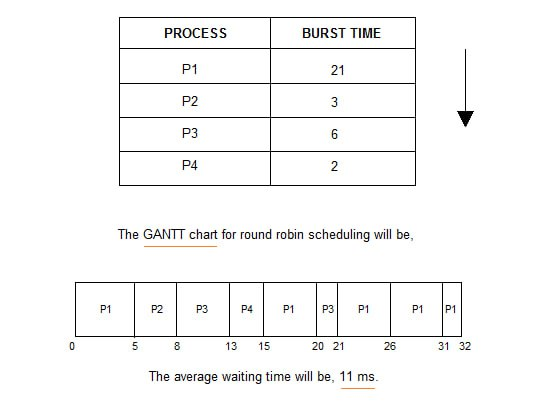

In [53]:

def round_robin(processes, quantum):
    n = len(processes)
    remaining_burst_times = [processes[i][1] for i in range(n)]
    current_time = 0
    completed_processes = 0
    start_times = []
    process_sequence = []
    waiting_time = [0] * n
    turnaround_time = [0] * n

    while completed_processes < n:
        for i in range(n):
            if remaining_burst_times[i] > 0:
                arrival_time, burst_time = processes[i]
                start_times.append(current_time)
                process_sequence.append(i + 1)

                if remaining_burst_times[i] > quantum:
                    remaining_burst_times[i] -= quantum
                    current_time += quantum
                else:
                    current_time += remaining_burst_times[i]
                    waiting_time[i] = current_time - arrival_time - burst_time
                    remaining_burst_times[i] = 0
                    completed_processes += 1
                    turnaround_time[i] = current_time - arrival_time
    return start_times, process_sequence ,waiting_time,turnaround_time

def plot_rr_gantt_chart(process_sequence, start_times, quantum):
    fig, axe = plt.subplots()
    axe.set_xlabel('time')
    axe.set_ylabel('processes')

    colors = ["red","blue","green","yellow","orange"]
    for i in range(len(process_sequence)):
        axe.broken_barh([(start_times[i], quantum)], (10 * process_sequence[i], 9), facecolors=(colors[process_sequence[i] % len(colors)]))

    axe.set_yticks([10 * (i+1) for i in range(len(set(process_sequence)))])
    axe.set_yticklabels([f'P{pid}' for pid in set(process_sequence)])
    axe.grid(True)

    plt.show()


processes = [(0, 21), (0, 3), (0, 6), (0, 2)]
quantum = 5
start_times, process_sequence,WT,TT =  round_robin(processes, quantum)


print("process :",processes)
print("RR sequence: ",process_sequence)
print("RR WT: ",WT)
print("RR TT: ",TT)

process : [(0, 21), (0, 3), (0, 6), (0, 2)]
RR sequence:  [1, 2, 3, 4, 1, 3, 1, 1, 1]
RR WT:  [11, 5, 15, 13]
RR TT:  [32, 8, 21, 15]


### RR Gantt Chart

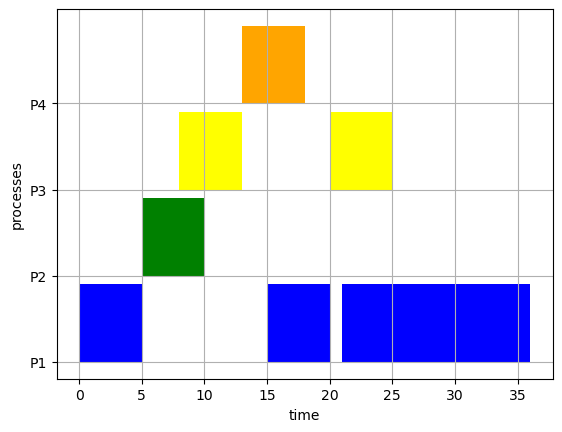

In [54]:
plot_rr_gantt_chart(process_sequence, start_times, quantum)

# SRTF

In [58]:
def srtf_scheduling(processes):
    n = len(processes)
    #sort by arrival time
    processes.sort(key=lambda x: (x[2] ))

    rem_burst = [processes[i][1] for i in range(n)]   # for 3 processes [9, 5 , 7 ]
    complete = 0
    t = 0
    minm = float('inf')
    shortest = 0
    check = False

    start_time = [-1] * n
    end_time = [-1] * n

    waiting_time = [0] * n
    turnaround_time = [0] * n

    while complete != n:
        for j in range(n):
            #arrival_time < timer and  remaining_time<minimum_time and remaning > 0
            if (processes[j][2] <= t) and (rem_burst[j] < minm) and rem_burst[j] > 0:
                minm = rem_burst[j]
                shortest = j
                check = True
                if start_time[shortest] ==-1:
                    start_time[shortest] = t

        if not check:
            t += 1
            continue

        rem_burst[shortest] -= 1
        minm = rem_burst[shortest]
        if minm == 0:
            minm = float('inf')

        if rem_burst[shortest] == 0:
            complete += 1
            check = False
            end_time[shortest] = t + 1
            turnaround_time[shortest] = t + 1 - processes[shortest][2]   #current_time - arrival_time
            waiting_time[shortest] =    t + 1 - ( processes[shortest][1]+processes[shortest][2])

        t += 1

    return start_time, end_time,waiting_time,turnaround_time

def plot_srtf_gantt_chart(processes, start_time, end_time):
    fig, axe = plt.subplots()
    axe.set_xlabel('time')
    axe.set_ylabel('processes')

    axe.set_yticks([10 + 10*i for i in range(len(processes))])
    axe.set_yticklabels([f'P{i}' for i in range(len(processes))])
    axe.grid(True)

    colors = ["red","blue","green","yellow","orange"]
    for i in range(len(start_time)):
        axe.broken_barh([(start_time[i], end_time[i] - start_time[i])], (10*(i%len(processes)+1), 10), facecolors=(colors[i%len(colors)]))

    plt.show()

# process (pid, burst time, arrival time)
processes = [(0, 12, 5), (1, 3, 7), (2, 2, 35)]


start_time, end_time,WT,TT = srtf_scheduling(processes)
print("Process :","(pid, burst time, arrival time )")
print("process :",processes)
print("srtf WT: ",WT)
print("srtf TT: ",TT)

Process : (pid, burst time, arrival time )
process : [(0, 12, 5), (1, 3, 7), (2, 2, 35)]
srtf WT:  [3, 0, 0]
srtf TT:  [15, 3, 2]


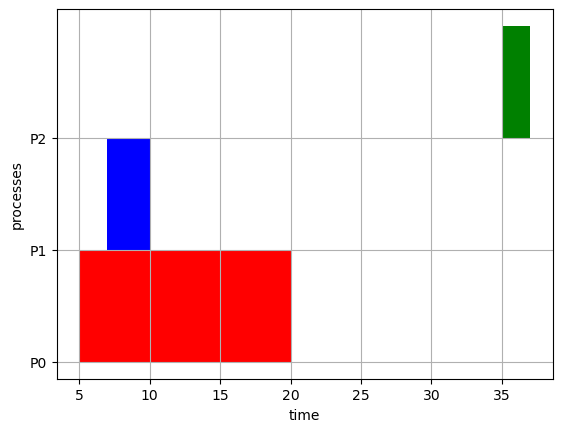

In [59]:
plot_srtf_gantt_chart(processes, start_time, end_time)